In [175]:
import numpy as np
import os
from PIL import Image
from xml.etree import ElementTree
from xml.etree.ElementTree import XMLParser

In [9]:
xml_dir = '/home/alex/poker/default/'
image_dir = '/home/alex/poker/fwd/'

In [18]:
xml = []
for element in sorted(os.listdir(xml_dir)):
    if element.endswith('.xml'): 
        xml+=[element]
        print (element, end = ', ')

image0000000082.xml, image0000000089.xml, image0000000141.xml, image0000000179.xml, image0000000184.xml, image0000000197.xml, image0000000465.xml, image0000000539.xml, image0000000564.xml, image0000000596.xml, image0000000617.xml, image0000000711.xml, image0000000724.xml, image0000000902.xml, image0000000928.xml, image0000000959.xml, image0000001003.xml, image0000001053.xml, image0000001092.xml, image0000001105.xml, 

In [82]:
image = []
for i in sorted(os.listdir(image_dir)):
    image += [i]
    print (i, end = ', ')

image0000000082.jpg, image0000000089.jpg, image0000000141.jpg, image0000000179.jpg, image0000000184.jpg, image0000000197.jpg, image0000000465.jpg, image0000000539.jpg, image0000000564.jpg, image0000000596.jpg, image0000000617.jpg, image0000000711.jpg, image0000000724.jpg, image0000000902.jpg, image0000000928.jpg, image0000000959.jpg, image0000001003.jpg, image0000001053.jpg, image0000001092.jpg, image0000001105.jpg, 

In [176]:
f = open(xml_dir + xml[0], 'r') 
contents =f.read()
f.close()
#print(contents)

In [ ]:
def to_number(some_num):
    return int(float(some_num))

In [137]:
def coordinate_by_xml(xml_file):
    tree = ElementTree.parse(xml_file)
    root = tree.getroot()
    count = 0
    a = {}
    for element in (root.iter("polygon")):
        count += 1
       # print ('--')
        a[count] = []
        for child in element:
            for i in child:

                if i.tag == 'x' or i.tag == 'y':
                   # print (i.text)
                    a[count] += [i.text]
    return (a)

In [164]:
def cut_polygon(image, coordinate):
    im = Image.open(image)
    cut = im.crop((to_number(coordinate[0]),to_number(coordinate[1]),
                   to_number(coordinate[4]), to_number(coordinate[5])))
    return np.asarray(cut)

In [167]:
image_list = []
for i in coordinate_by_xml(xml_dir+xml[0]).values():    
    image_list += [cut_polygon(image_dir+image[0], i)]

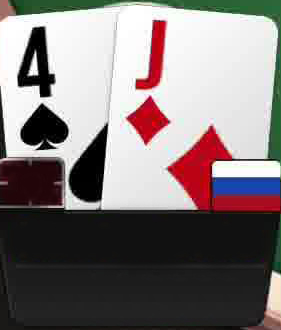

In [169]:
Image.fromarray(image_list[0])

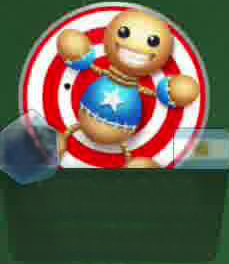

In [170]:
Image.fromarray(image_list[1])

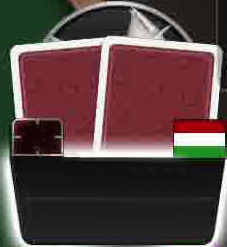

In [171]:
Image.fromarray(image_list[2])

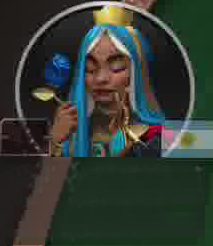

In [172]:
Image.fromarray(image_list[3])

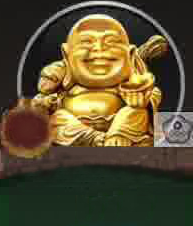

In [173]:
Image.fromarray(image_list[4])

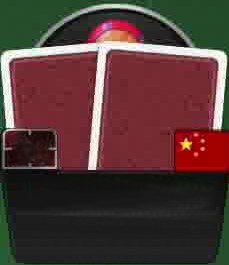

In [174]:
Image.fromarray(image_list[5])